In [55]:
#Step 1: Install Dependencies (if needed)
!pip install pandas numpy scikit-learn matplotlib seaborn

In [56]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


file_path = "/kaggle/input/titanic-dataset/Titanic-Dataset.csv"  
df = pd.read_csv(file_path)

#Data Preprocessing 
print("\nDataset Information:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())
df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True, errors="ignore")
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Create new feature: Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # Include self
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize"]
X = df[features]
y = df["Survived"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data preprocessing complete!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Dataset Information:
 None

First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5      

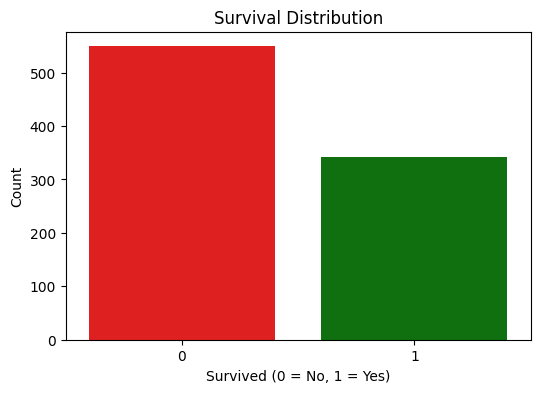

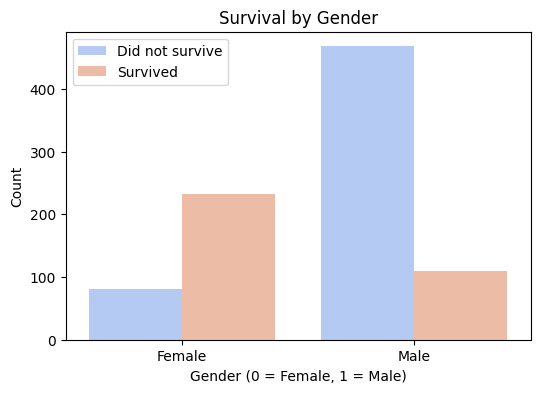

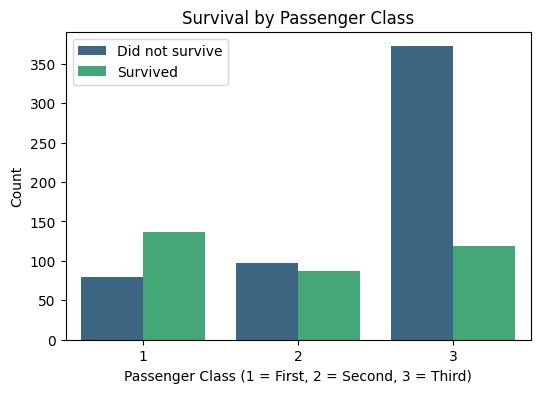

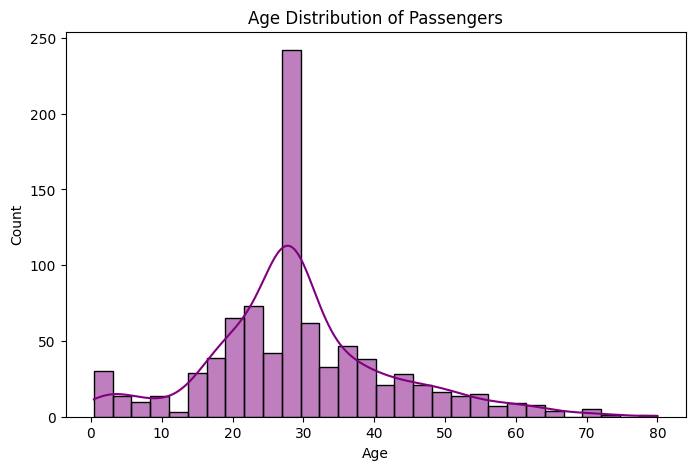

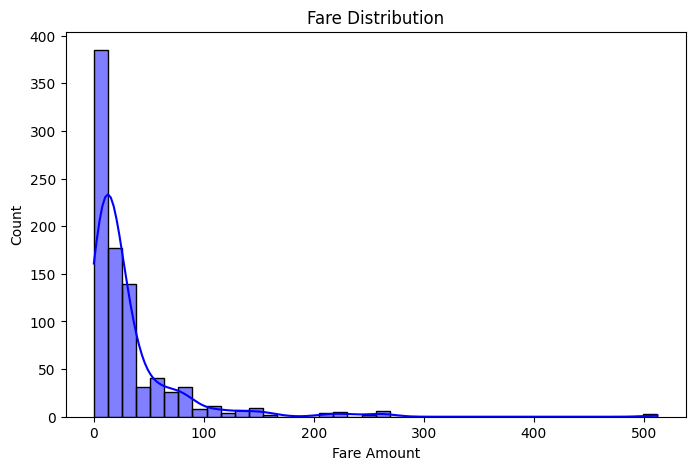

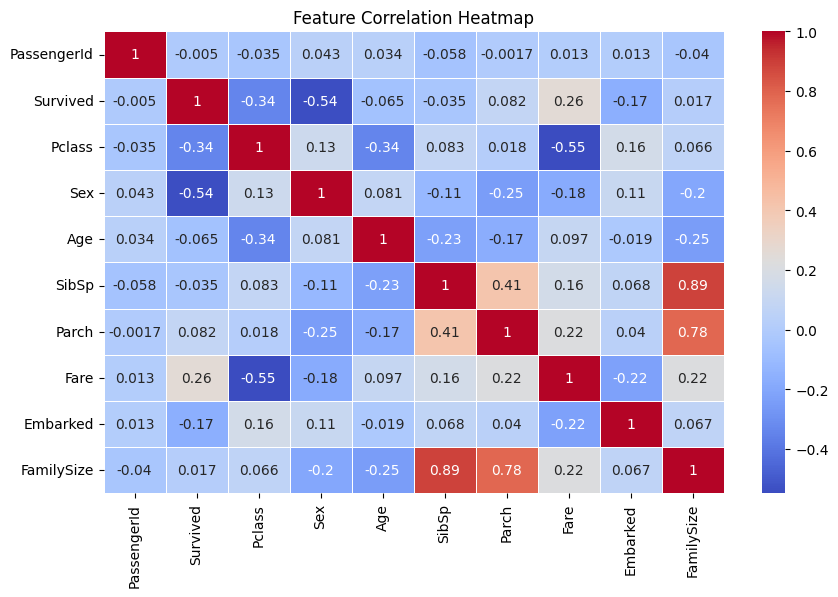

In [57]:
# Step 3: Data Visualization
#1 Survival Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette=["red", "green"])
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#2 Survival Rate by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.legend(["Did not survive", "Survived"])
plt.show()

#3 Survival Rate by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="viridis")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

#4 Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="purple")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#5 Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], bins=40, kde=True, color="blue")
plt.title("Fare Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Count")
plt.show()

#6 Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_data = df.select_dtypes(include=["number"])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [58]:
#Step 4: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\n✅ Random Forest model trained successfully!")



✅ Random Forest model trained successfully!


In [59]:
#Step 5: Evaluate Model Performance
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"\n✅ Model Performance:")
print(f"🎯 Accuracy: {accuracy:.4f}")
print(f"🔍 Precision: {precision:.4f}")
print(f"📌 Recall: {recall:.4f}")
print(f"⚖️ F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📜 Classification Report:\n", classification_report(y_test, y_pred))



✅ Model Performance:
🎯 Accuracy: 0.8324
🔍 Precision: 0.8235
📌 Recall: 0.7568
⚖️ F1-Score: 0.7887

📊 Confusion Matrix:
 [[93 12]
 [18 56]]

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



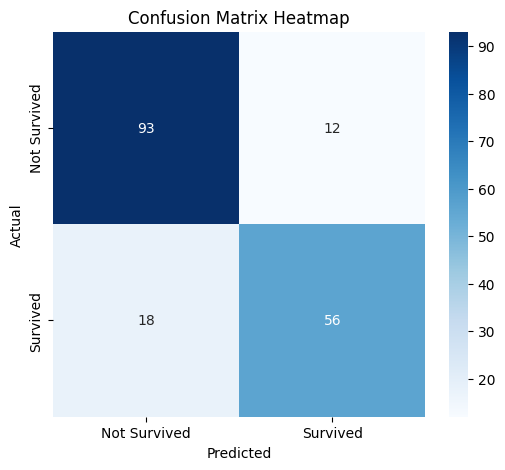

In [60]:
# Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


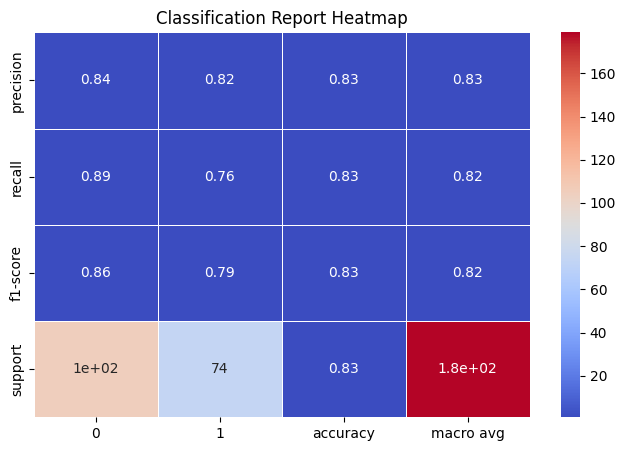

In [61]:
#Classification Report as Heatmap
# Convert classification report to DataFrame
class_report_dict = classification_report(y_test, y_pred, output_dict=True)  # Convert to dictionary
class_report_df = pd.DataFrame(class_report_dict).T  # Convert to DataFrame

# Plot classification report as a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()


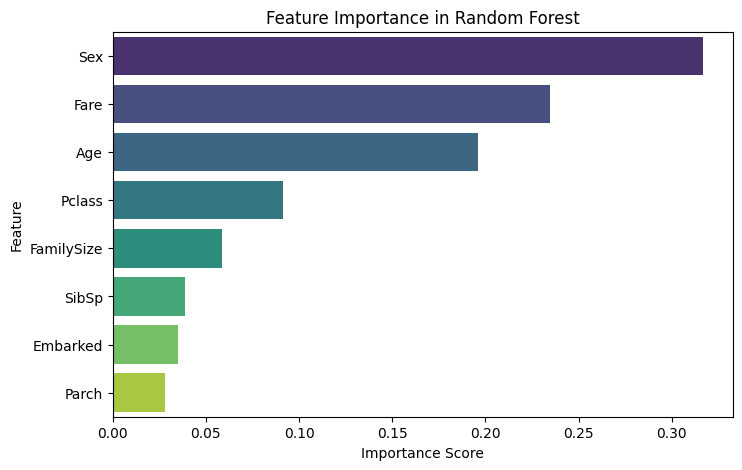

In [62]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({"Feature": features, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


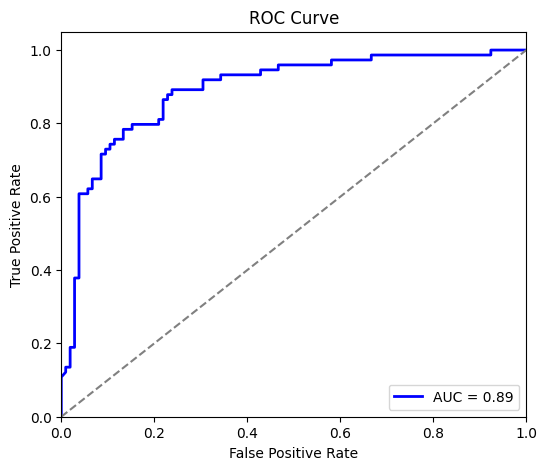

In [63]:
# Compute ROC curve and AUC score
from sklearn.metrics import roc_curve, auc
y_prob = rf_model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [64]:
# Step 6: Make Predictions
sample_passenger = {
    "Pclass": 3, "Sex": 1, "Age": 25, "SibSp": 0, "Parch": 0, "Fare": 7.25, "Embarked": 2, "FamilySize": 1
}

# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_passenger])

# Predict survival
prediction = rf_model.predict(input_df)

# Display result
result = "Survived" if prediction[0] == 1 else "Did Not Survive"
print(f"\n🔍 Prediction for the sample passenger: {result}")



🔍 Prediction for the sample passenger: Did Not Survive
